# Programa de capacitação

**Sistemas ópticos coerentes**

Adolfo Fernandes Herbster

Essentials of Signal Processing

<a href="https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/" target="_blank">https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/</a>

<a href="mailto:adolfofh@dee.ufcg.edu.br">adolfofh@dee.ufcg.edu.br</a>

Embedded/DEE/CEEI/UFCG - 2018

# Reviewer

## Rectangular pulse

As as simple starting point example, consider $x(t) = \prod\left(t\pi\right)$. The well known result for the Fourier transfrom (FT) is:
\begin{equation}
    X(f) = \mathfrak{F}\left[ \prod\left( \frac{t}{\tau} \right)\right] = \tau \, \mathrm{sinc}(f \tau),
\end{equation}
where
\begin{equation}
    \prod\left( \frac{t}{\tau} \right) = 
    \begin{cases}
        1, |t| \le \tau/2, \\
        0, \mathrm{otherwise}.
    \end{cases}
\end{equation}
We now use the above defined $\texttt{FT_approx()}$ to obtain a numerical approximation to the FT of the rectangular pulse.

In [2]:
import numpy as num
import matplotlib.pyplot as plt
import sk_dsp_comm.sigsys as ss

fs = 100 # sampling rate in Hz
tau = 0.5
t = num.arange(-5,5,1/fs)
x0 = ss.rect(t,tau)

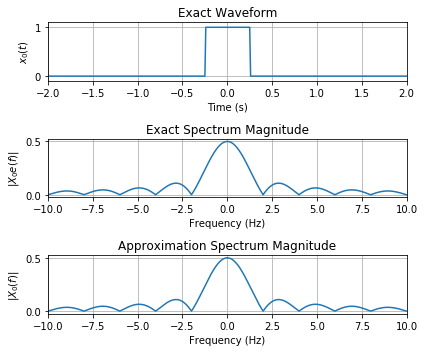

In [3]:
## Rectangle waveform
plt.figure(figsize=(6,5))
plt.subplot(311)
plt.plot(t,x0)
plt.grid()
plt.ylim([-0.1,1.1])
plt.xlim([-2,2])
plt.title(r'Exact Waveform')
plt.xlabel(r'Time (s)')
plt.ylabel(r'$x_0(t)$');

# FT Exact Plot
fe = num.arange(-10,10,.01)
X0e = tau*num.sinc(fe*tau)
plt.subplot(312)
plt.plot(fe,abs(X0e))
#plot(f,angle(X0))
plt.grid()
plt.xlim([-10,10])
plt.title(r'Exact Spectrum Magnitude')
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|X_0e(f)|$');

# FT Approximation Plot
f,X0 = ss.ft_approx(x0,t,4096)
plt.subplot(313)
plt.plot(f,abs(X0))
#plot(f,angle(X0))
plt.grid()
plt.xlim([-10,10])
plt.title(r'Approximation Spectrum Magnitude')
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|X_0(f)|$');
plt.tight_layout()

## Modulated signal BPSK

In this problem you are given
\begin{equation}
    x_1(t) = \prod \left( \frac{t+1/2}{1} \right) - \prod \left( \frac{t-1/2}{1} \right).
\end{equation}
The Fourier transfrom of this signal can be found using linearity and the time delay theorems.
\begin{align}
    X_1(f) &= \mathfrak{F} \left[ \prod \left( \frac{t+1/2}{1} \right) - \prod \left( \frac{t-1/2}{1} \right) \right] \\ \nonumber
           &= 2j \, \mathrm{sinc}(f) \, \sin(\pi f).
\end{align}

In [4]:
fs = 100
t  = num.arange(-5,5,1/fs)
x1 = ss.rect(t+1/2,1)-ss.rect(t-1/2,1)
# Exact
fe   = num.arange(-10,10,.01)
X1e  = 2*1j*num.sinc(fe)*num.sin(num.pi*fe)
# Approx.
f,X1 = ss.ft_approx(x1,t,4096)

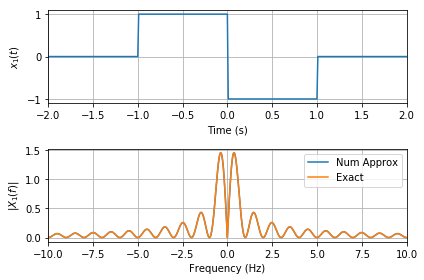

In [5]:
plt.subplot(211)
plt.plot(t,x1)
plt.grid()
plt.ylim([-1.1,1.1])
plt.xlim([-2,2])
plt.xlabel(r'Time (s)')
plt.ylabel(r'$x_1(t)$');

plt.subplot(212)
plt.plot(f,abs(X1))
plt.plot(fe,abs(X1e))
#plot(f,angle(X1))
plt.legend((r'Num Approx',r'Exact'),loc='best')
plt.grid()
plt.xlim([-10,10])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|X_1(f)|$');
plt.tight_layout()

In [6]:
fs  = 100 # sampling rate in Hz
tau = 1
t   = num.arange(-5,5,1/fs)
x3  = ss.rect(t+1/2,1)-ss.rect(t-1/2,1)
y   = x3*num.cos(2*num.pi*10*t)
f,Y = ss.ft_approx(y,t,4096)

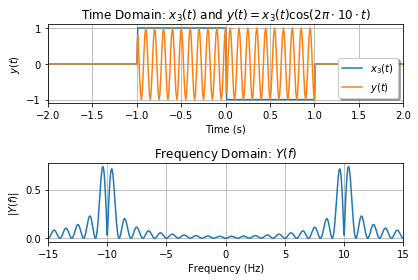

In [7]:
plt.subplot(211)
plt.plot(t,x3)
plt.plot(t,y)
plt.grid()
plt.ylim([-1.1,1.1])
plt.xlim([-2,2])
plt.legend((r'$x_3(t)$', r'$y(t)$'),loc='lower right',shadow=True)
plt.title(r'Time Domain: $x_3(t)$ and $y(t)=x_3(t)\cos(2\pi\cdot  10\cdot t)$')
plt.xlabel(r'Time (s)')
plt.ylabel(r'$y(t)$');
plt.subplot(212)
plt.plot(f,abs(Y))
#plot(f,angle(X0))
plt.grid()
plt.title(r'Frequency Domain: $Y(f)$')
plt.xlim([-15,15])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|Y(f)|$');
plt.tight_layout()

#  A general digital communication system

A general digital communication system block diagram is shown in figure below.

<img src="general_digital_communication_system.png" style="width: 600px;"/>

By setting and letting we arrive at binary phase-shift keying (BPSK) by including a pulse shape and a sinusoidal carrier:
\begin{equation}
    x_c(t) = A\sum_{k = -\infty}^\infty a_k p(t - kT_b)\cos(2\pi f_c t) = A \mathrm{Re} \left[(a_k + j0) e^{2 \pi j f_c t} \right]
\end{equation}

where $p(t)$ is a pulse shaping function, $T_b = T_s$ is the bit period (also the symbol period as only one bit per symbol), $f_c$ the carrier frequency, and $A$ is an arbitrary amplitude scale factor.

## Pulse shape
We know that in theory a bandlimited signal can only be generated from a signal having infinite duration. Specifically, a signal with rectangular spectrum has Fourier transfrom pair:
\begin{equation}
    x(t) = 2W\mathrm{sinc}(2Wt) \Leftrightarrow \prod\left( \frac{f}{2W} \right) = X(f).
\end{equation}
In a simulation we expect to have troubles modeling the finite duration aspects of the signal.

In [8]:
fs = 100 # sampling rate in Hz
W  = 5
t  = num.arange(-5,5,1/fs)
x4 = 2*W*num.sinc(2*W*t)
f,X4 = ss.ft_approx(x4,t,4096)

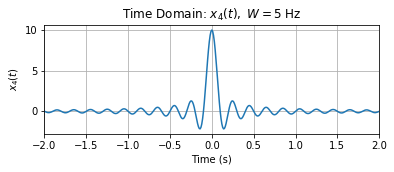

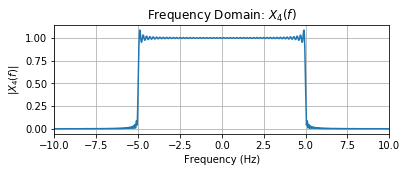

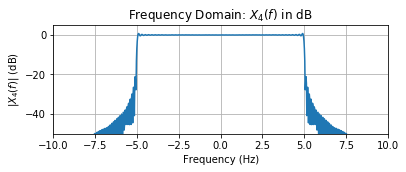

In [9]:
plt.figure(figsize=(6,2))
plt.plot(t,x4)
plt.grid()
#ylim([-1.1,1.1])
plt.xlim([-2,2])
plt.title(r'Time Domain: $x_4(t),\ W = 5$ Hz')
plt.xlabel(r'Time (s)')
plt.ylabel(r'$x_4(t)$');

plt.figure(figsize=(6,2))
plt.plot(f,abs(X4))
plt.grid()
plt.title(r'Frequency Domain: $X_4(f)$')
plt.xlim([-10,10])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|X_4(f)|$');
plt.figure(figsize=(6,2))
plt.plot(f,20*num.log10(abs(X4)))
plt.grid()
plt.title(r'Frequency Domain: $X_4(f)$ in dB')
plt.ylim([-50,5])
plt.xlim([-10,10])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|X_4(f)|$ (dB)');

The purpose of the pulse shape filter is to control the spectrum of the signal. A simple option is to produce rectangle pulses of duration to represent each symbol. The transmitted signal spectrum will have the form , which has very large sidelobes and hence have a large spectral footprint. If you try to filter the signal to reduce the bandwidth the signal will now contain
intersymbol interference (ISI), which smears energy from adjacent bits together. The ISI impairs the overall link performance by increasing the probability of making a bit error.

A popular end-to-end pulse shape is the raised cosine (RC) and the related square root raised cosine (SRC or RRC). The SRC pulse is the best choice as the shaping filter can be spread equally between the transmitter and the receiver to not only insure zero ISI, but also gain AWGN immunity in an optimal way.

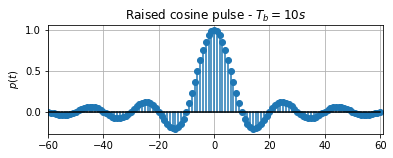

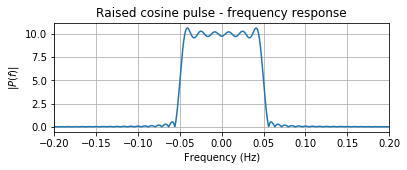

In [10]:
from sk_dsp_comm.sigsys import rc_imp
# truncated raised cosine pulse
b = rc_imp(10,0.1)
n = num.arange(-10*6,10*6+1)
f,X5 = ss.ft_approx(b,n,4096)

plt.figure(figsize=(6,2))
plt.stem(n,b,basefmt="k")
plt.title(r'Raised cosine pulse - $T_b = 10s$');
plt.ylabel(r'$p(t)$');
plt.xlim(-10*6,10*6+1)
plt.grid()
plt.show()

plt.figure(figsize=(6,2))
plt.plot(f,num.abs(X5))
plt.title(r'Raised cosine pulse - frequency response');
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|P(f)|$');
plt.xlim(-0.2,0.2)
plt.grid()
plt.show()

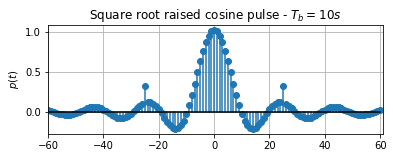

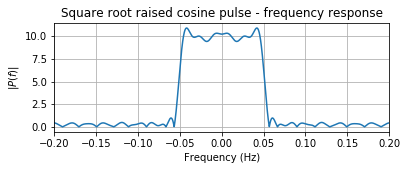

In [11]:
from sk_dsp_comm.sigsys import sqrt_rc_imp
# square root raised cosine pulse
b = sqrt_rc_imp(10,0.1)
n = num.arange(-10*6,10*6+1)
f,X6 = ss.ft_approx(b,n,4096)

plt.figure(figsize=(6,2))
plt.stem(n,b,basefmt="k")
plt.title(r'Square root raised cosine pulse - $T_b = 10s$');
plt.ylabel(r'$p(t)$');
plt.xlim(-10*6,10*6+1);
plt.grid()
plt.show()

plt.figure(figsize=(6,2))
plt.plot(f,num.abs(X6))
plt.title(r'Square root raised cosine pulse - frequency response');
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|P(f)|$');
plt.xlim(-0.2,0.2)
plt.grid()
plt.show()

The pulse shape, $p(t)$, can be as simple as a rectangle pulse of duration $T_c$, or a perhaps a square-root raised cosine pulse shape, extending over $\pm 6T_b$ intervals, and having a very compact spectrum, i.e., 1.25$R_b$, where $R_b = 1/T_b$ is the bit rate.

In [12]:
from scipy import signal
b   = sqrt_rc_imp(16, 0.1)
y   = signal.lfilter(b, 1, x3)/16

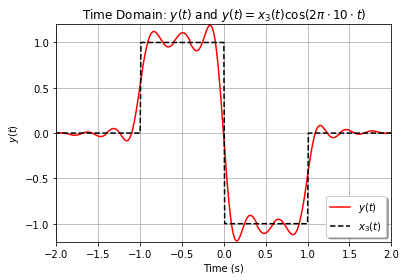

In [13]:
def foo(a, start, stop): 
    # fn to convert your start stop to a wrapped range
    if stop<=start:
        stop += len(a)
    return num.arange(start, stop)%len(a)

plt.plot(t, y[foo(t, 97, 97)], 'r', t, x3, 'k--');
plt.ylim([-1.2,1.2])
plt.xlim([-2,2])
plt.legend((r'$y(t)$', r'$x_3(t)$'), loc='lower right',shadow=True)
plt.title(r'Time Domain: $y(t)$ and $y(t)=x_3(t)\cos(2\pi\cdot  10\cdot t)$')
plt.xlabel(r'Time (s)')
plt.ylabel(r'$y(t)$');
plt.grid();

C:\Users\Adolfo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


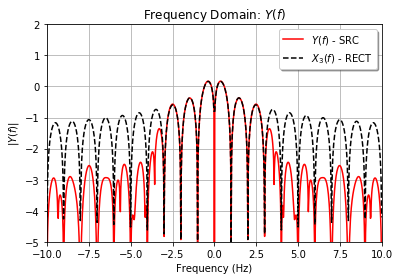

In [14]:
f,Y  = ss.ft_approx(y,  t, 4096)
f,X3 = ss.ft_approx(x3, t, 4096)
plt.plot(f,num.log10(abs(Y)), 'r', f, num.log10(abs(X3)), 'k--')
plt.grid()
plt.title(r'Frequency Domain: $Y(f)$')
plt.xlim([-10,10])
plt.ylim([-5,2])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|Y(f)|$');
plt.legend((r'$Y(f)$ - SRC', r'$X_3(f)$ - RECT'),shadow=True)

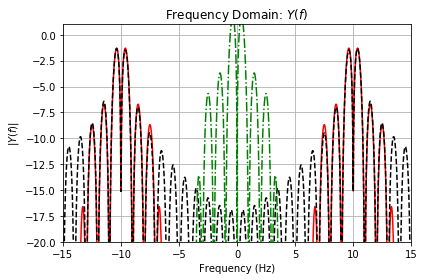

In [16]:
y_c  = y*num.cos(2*num.pi*10*t)
f,Y  = ss.ft_approx(y_c,t,4096)
x3_c = x3*num.cos(2*num.pi*10*t)
f,X3_c = ss.ft_approx(x3_c,t,4096)
f,Y_t = ss.ft_approx(y,t,4096)
plt.plot(f,10*num.log10(abs(Y)), 'r', 
         f, 10*num.log10(abs(X3_c)), 'k--',
         f, 10*num.log10(abs(Y_t)), 'g-.')
plt.grid()
plt.title(r'Frequency Domain: $Y(f)$')
plt.xlim([-15,15])
plt.ylim([-20,1])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$|Y(f)|$');
plt.tight_layout()